In [480]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [274]:
home_train = './train.csv'
o_train = pd.read_csv(home_train)

In [275]:
o_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [276]:
o_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [277]:
obj_train = o_train.select_dtypes(include=['object']).copy()
obj_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [278]:
obj_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [279]:
obj_train.MSZoning.unique()
obj_train['MSZoning'].isnull().sum()

0

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


/Users/jackbrietzke/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

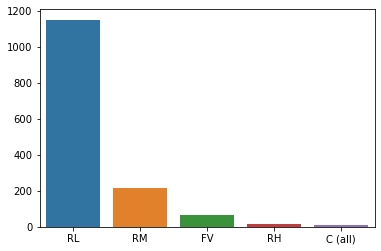

In [280]:
ms = obj_train['MSZoning'].value_counts()
print(ms)
sns.barplot(ms.index, ms.values)

In [281]:
obj_train = pd.get_dummies(obj_train, columns=['MSZoning'], prefix=['MSZoning'], dummy_na=True)
print(obj_train)

     Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0      Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1      Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2      Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3      Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4      Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...     ...   ...      ...         ...       ...       ...       ...   
1455   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ...  Fence MiscFeature SaleType  \
0         CollgCr       Norm       Norm  ...    NaN        

In [282]:
print(obj_train['Street'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64


In [283]:
# Going to drop streets because not much variability
del obj_train['Street']

In [284]:
print(obj_train['Alley'].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64


In [285]:
obj_train['Alley'].isnull().sum()

1369

In [286]:
# Going to drop streets because too many null values
del obj_train['Alley']

In [287]:
print(obj_train['LotShape'].value_counts())
print(obj_train['LotShape'].isnull().sum())

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
0


In [288]:
keep_cols = ['LotShape']

In [289]:
def genData(col):
    print(obj_train[col].value_counts())
    print('How many nulls: ', obj_train[col].isnull().sum())
genData('LandContour')

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
How many nulls:  0


In [290]:
# Not enough variability
drop_cols = ['LandContour']

In [291]:
genData('Utilities')

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
How many nulls:  0


In [292]:
drop_cols.append('Utilities')

In [293]:
genData('LotConfig')

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
How many nulls:  0


In [294]:
keep_cols.append('LotConfig')

In [295]:
genData('LandSlope')

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
How many nulls:  0


In [296]:
# Not enough variability
drop_cols.append('LandSlope')

In [297]:
genData('Neighborhood')

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
How many nulls:  0


In [298]:
keep_cols.append('Neighborhood')

In [299]:
genData('Condition1')

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
How many nulls:  0


In [300]:
genData('Condition2')

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64
How many nulls:  0


In [301]:
keep_cols.append('Condition1')
drop_cols.append('Condition2')

In [302]:
genData('BldgType')

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
How many nulls:  0


In [303]:
keep_cols.append('BldgType')

In [304]:
genData('HouseStyle')

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
How many nulls:  0


In [305]:
keep_cols.append('HouseStyle')

In [306]:
genData('RoofStyle')

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
How many nulls:  0


In [307]:
print(keep_cols)

['LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle']


In [308]:
keep_cols.append('RoofStyle')

In [309]:
genData('RoofMatl')

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64
How many nulls:  0


In [310]:
drop_cols.append('RoofMatl')

In [311]:
genData('Exterior1st')

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64
How many nulls:  0


In [312]:
keep_cols.append('Exterior1st')

In [313]:
genData('Exterior2nd')

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
How many nulls:  0


In [314]:
keep_cols.append('Exterior2nd')

In [315]:
genData('MasVnrType')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
How many nulls:  8


In [316]:
keep_cols.append('MasVnrType')

In [317]:
genData('ExterQual')

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
How many nulls:  0


In [318]:
keep_cols.append('ExterQual')

In [319]:
genData('ExterCond')

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
How many nulls:  0


In [320]:
drop_cols.append('ExterCond')

In [321]:
genData('Foundation')

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
How many nulls:  0


In [322]:
keep_cols.append('Foundation')

In [323]:
genData('BsmtCond')

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
How many nulls:  37


In [324]:
drop_cols.append('BsmtCond')

In [325]:
genData('BsmtQual')

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
How many nulls:  37


In [326]:
keep_cols.append('BsmtQual')

In [327]:
genData('BsmtExposure')

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
How many nulls:  38


In [328]:
keep_cols.append('BsmtExposure')

In [329]:
genData('BsmtFinType1')

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
How many nulls:  37


In [330]:
genData('BsmtFinType2')

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
How many nulls:  38


In [331]:
keep_cols.append('BsmtFinType1')
drop_cols.append('BsmtFinType2')

In [332]:
genData('Heating')

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
How many nulls:  0


In [333]:
drop_cols.append('Heating')

In [334]:
genData('HeatingQC')

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
How many nulls:  0


In [335]:
keep_cols.append('HeatingQC')

In [336]:
genData('CentralAir')

Y    1365
N      95
Name: CentralAir, dtype: int64
How many nulls:  0


In [337]:
keep_cols.append('CentralAir')

In [338]:
genData('Electrical')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
How many nulls:  1


In [339]:
drop_cols.append('Electrical')

In [340]:
genData('KitchenQual')

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
How many nulls:  0


In [341]:
keep_cols.append('KitchenQual')

In [342]:
genData('Functional')

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
How many nulls:  0


In [343]:
keep_cols.append('Functional')

In [344]:
genData('FireplaceQu')

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
How many nulls:  690


In [345]:
keep_cols.append('FireplaceQu')

In [346]:
genData('GarageType')

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
How many nulls:  81


In [347]:
keep_cols.append('GarageType')

In [348]:
genData('GarageFinish')

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
How many nulls:  81


In [349]:
keep_cols.append('GarageFinish')

In [350]:
genData('GarageQual')

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
How many nulls:  81


In [351]:
drop_cols.append('GarageQual')

In [352]:
genData('GarageCond')

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
How many nulls:  81


In [353]:
drop_cols.append('GarageCond')

In [354]:
genData('PavedDrive')

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
How many nulls:  0


In [355]:
keep_cols.append('PavedDrive')

In [356]:
genData('PoolQC')

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64
How many nulls:  1453


In [357]:
drop_cols.append('PoolQC')

In [358]:
genData('Fence')

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
How many nulls:  1179


In [359]:
drop_cols.append('Fence')

In [360]:
genData('MiscFeature')

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
How many nulls:  1406


In [361]:
drop_cols.append('MiscFeature')

In [362]:
genData('SaleType')

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
How many nulls:  0


In [363]:
keep_cols.append('SaleType')

In [364]:
genData('SaleCondition')

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
How many nulls:  0


In [365]:
keep_cols.append('SaleCondition')

In [366]:
for col in drop_cols:
    del obj_train[col]

In [367]:
print(obj_train.head())

  LotShape LotConfig Neighborhood Condition1 BldgType HouseStyle RoofStyle  \
0      Reg    Inside      CollgCr       Norm     1Fam     2Story     Gable   
1      Reg       FR2      Veenker      Feedr     1Fam     1Story     Gable   
2      IR1    Inside      CollgCr       Norm     1Fam     2Story     Gable   
3      IR1    Corner      Crawfor       Norm     1Fam     2Story     Gable   
4      IR1       FR2      NoRidge       Norm     1Fam     2Story     Gable   

  Exterior1st Exterior2nd MasVnrType  ... GarageFinish PavedDrive SaleType  \
0     VinylSd     VinylSd    BrkFace  ...          RFn          Y       WD   
1     MetalSd     MetalSd       None  ...          RFn          Y       WD   
2     VinylSd     VinylSd    BrkFace  ...          RFn          Y       WD   
3     Wd Sdng     Wd Shng       None  ...          Unf          Y       WD   
4     VinylSd     VinylSd    BrkFace  ...          RFn          Y       WD   

  SaleCondition MSZoning_C (all) MSZoning_FV MSZoning_RH MSZon

In [368]:
for col in keep_cols:
    obj_train = pd.get_dummies(obj_train, columns=[col], prefix=[col], dummy_na=True)

In [369]:
print(obj_train.columns)

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'MSZoning_nan', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg',
       ...
       'SaleType_Oth', 'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan'],
      dtype='object', length=202)


<AxesSubplot:>

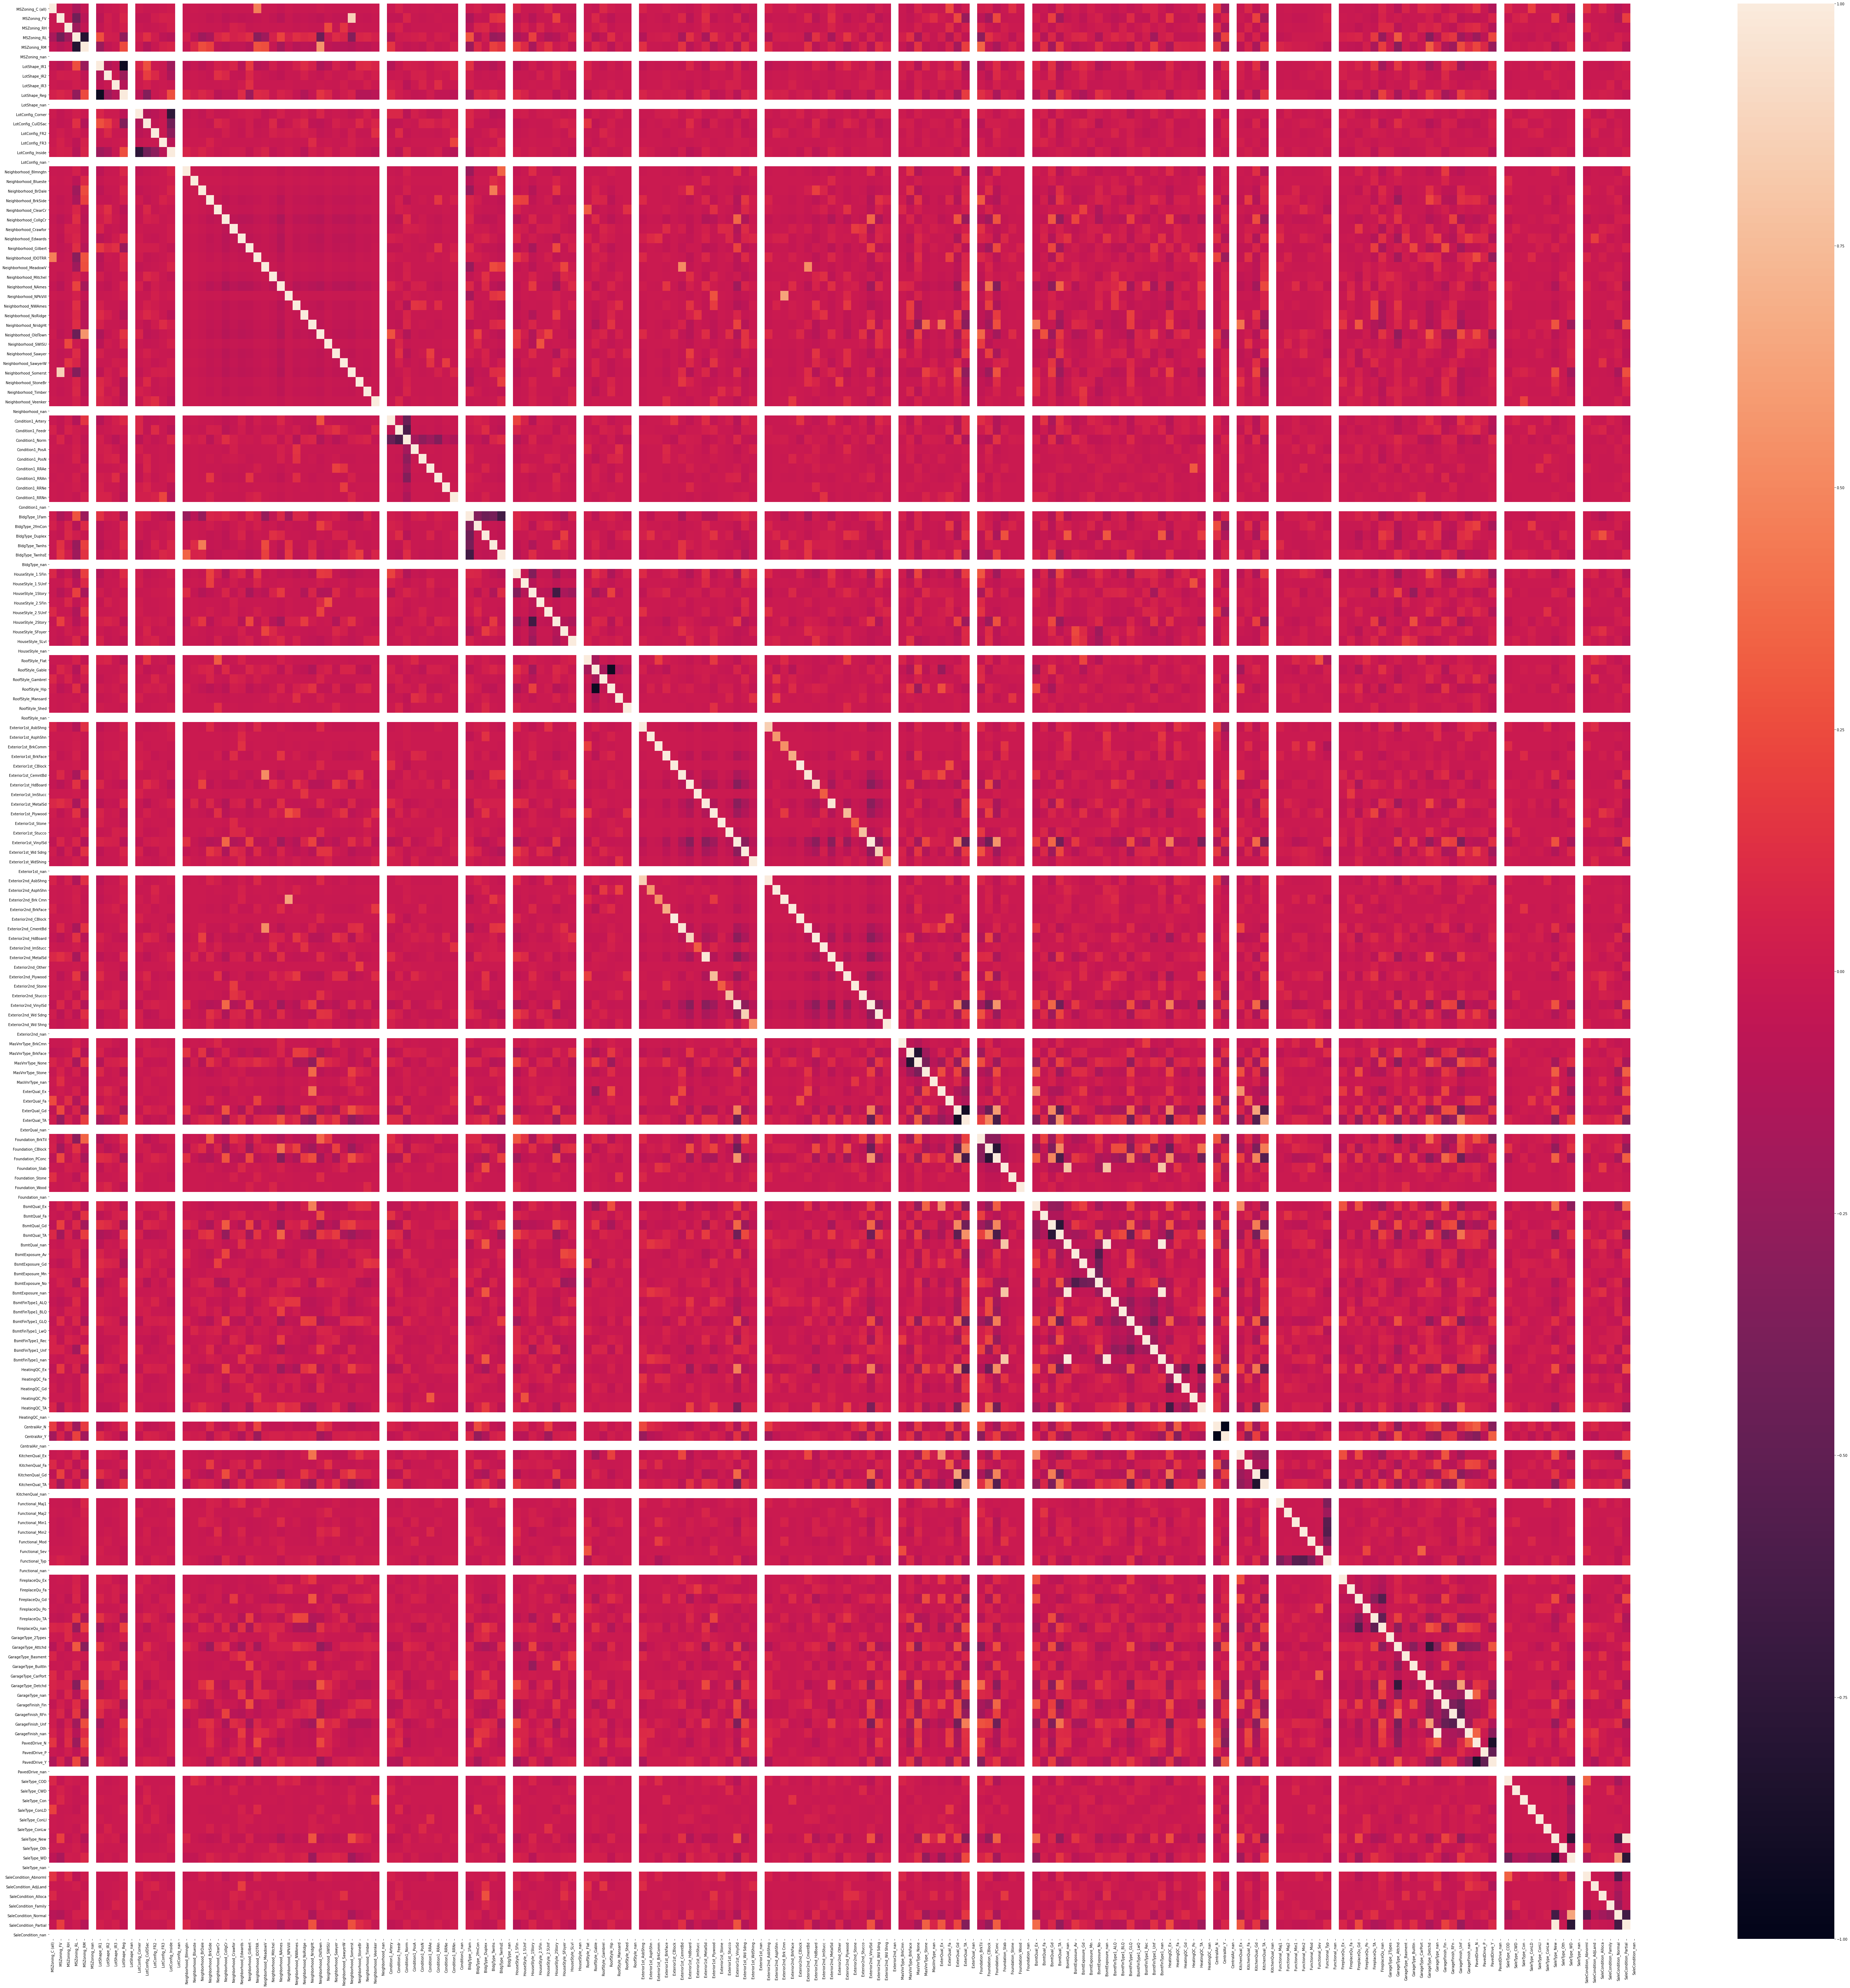

In [370]:
dims = (100,100)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(obj_train.corr())

In [371]:
obj_train.corr()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
MSZoning_C (all),1.000000,-0.017926,-0.008742,-0.160278,-0.034792,NaN,-0.040840,-0.014116,-0.006897,0.045922,...,-0.003768,-0.065664,NaN,0.140993,-0.004353,0.084420,-0.009787,-0.091013,-0.025412,NaN
MSZoning_FV,-0.017926,1.000000,-0.022722,-0.416608,-0.090435,NaN,-0.081464,0.023612,-0.017926,0.074564,...,-0.009795,-0.151069,NaN,-0.006499,-0.011314,-0.019651,-0.025439,-0.124064,0.195066,NaN
MSZoning_RH,-0.008742,-0.022722,1.000000,-0.203158,-0.044101,NaN,-0.046176,0.021930,-0.008742,0.039092,...,-0.004776,0.021659,NaN,0.100935,-0.005517,-0.009583,-0.012405,-0.036497,-0.032210,NaN
MSZoning_RL,-0.160278,-0.416608,-0.203158,1.000000,-0.808585,NaN,0.261574,0.027175,0.022698,-0.268764,...,0.023511,0.015608,NaN,-0.063595,0.027158,-0.008548,-0.025492,0.046098,0.002730,NaN
MSZoning_RM,-0.034792,-0.090435,-0.044101,-0.808585,1.000000,NaN,-0.229711,-0.047949,-0.011491,0.242838,...,-0.019011,0.078404,NaN,0.014535,-0.021959,0.004432,0.049827,0.050686,-0.100724,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_Alloca,0.084420,-0.019651,-0.009583,-0.008548,0.004432,NaN,-0.031877,-0.015474,-0.007560,0.037744,...,-0.004131,0.035530,NaN,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856,NaN
SaleCondition_Family,-0.009787,-0.025439,-0.012405,-0.025492,0.049827,NaN,-0.032922,-0.020032,0.061658,0.028480,...,-0.005348,0.028599,NaN,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062,NaN
SaleCondition_Normal,-0.091013,-0.124064,-0.036497,0.046098,0.050686,NaN,0.003241,0.014667,-0.026089,-0.003730,...,-0.097031,0.634322,NaN,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323,NaN
SaleCondition_Partial,-0.025412,0.195066,-0.032210,0.002730,-0.100724,NaN,0.034121,0.007257,0.033950,-0.041636,...,-0.013885,-0.769559,NaN,-0.083419,-0.016038,-0.027856,-0.036062,-0.654323,1.000000,NaN


In [372]:
int_train = o_train.select_dtypes(include=['int']).copy()
int_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [373]:
drop_cols = []
keep_cols = []

In [374]:
drop_cols.append('Id')

In [375]:
def genData2(col):
    print(int_train[col].value_counts())
    print('Null Values', int_train[col].isnull().sum())

genData2('MSSubClass')

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
Null Values 0


In [376]:
keep_cols.append('MSSubClass')

In [377]:
int_train.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [378]:
drop_cols = []
keep_cols = []
print(drop_cols)
for col in int_train.columns:
    print(col)
    genData2(col)
    print('Keep y or Toss 0')
    response = input()
    if response == 'y': 
        keep_cols.append(col)
    else:
        drop_cols.append(col)

[]
Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
Null Values 0
Keep y or Toss 0
n
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
Null Values 0
Keep y or Toss 0
y
LotArea
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
13031     1
10991     1
8944      1
6897      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
Null Values 0
Keep y or Toss 0
y
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
Null Values 0
Keep y or Toss 0
y
OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
Null Values 0
Keep y or Toss 0
y
YearBuilt
2006    67
200

In [379]:
print(drop_cols)

['Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [380]:
print(keep_cols)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']


In [381]:
int_train = int_train.drop(drop_cols, axis=1)

In [382]:
int_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,150,856,856,...,3,8,0,2,548,0,61,2,2008,208500
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,3,6,1,2,460,298,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,434,920,920,...,3,6,1,2,608,0,42,9,2008,223500
3,70,9550,7,5,1915,1970,216,540,756,961,...,3,7,1,3,642,0,35,2,2006,140000
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,4,9,1,3,836,192,84,12,2008,250000


In [383]:
int_train.corr().round(2)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.14,0.03,-0.06,0.03,0.04,-0.07,-0.14,-0.24,-0.25,...,-0.02,0.04,-0.05,-0.04,-0.10,-0.01,-0.01,-0.01,-0.02,-0.08
LotArea,-0.14,1.00,0.11,-0.01,0.01,0.01,0.21,-0.00,0.26,0.30,...,0.12,0.19,0.27,0.15,0.18,0.17,0.08,0.00,-0.01,0.26
OverallQual,0.03,0.11,1.00,-0.09,0.57,0.55,0.24,0.31,0.54,0.48,...,0.10,0.43,0.40,0.60,0.56,0.24,0.31,0.07,-0.03,0.79
OverallCond,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.05,-0.14,-0.17,-0.14,...,0.01,-0.06,-0.02,-0.19,-0.15,-0.00,-0.03,-0.00,0.04,-0.08
YearBuilt,0.03,0.01,0.57,-0.38,1.00,0.59,0.25,0.15,0.39,0.28,...,-0.07,0.10,0.15,0.54,0.48,0.22,0.19,0.01,-0.01,0.52
YearRemodAdd,0.04,0.01,0.55,0.07,0.59,1.00,0.13,0.18,0.29,0.24,...,-0.04,0.19,0.11,0.42,0.37,0.21,0.23,0.02,0.04,0.51
BsmtFinSF1,-0.07,0.21,0.24,-0.05,0.25,0.13,1.00,-0.50,0.52,0.45,...,-0.11,0.04,0.26,0.22,0.30,0.20,0.11,-0.02,0.01,0.39
BsmtUnfSF,-0.14,-0.00,0.31,-0.14,0.15,0.18,-0.50,1.00,0.42,0.32,...,0.17,0.25,0.05,0.21,0.18,-0.01,0.13,0.03,-0.04,0.21
TotalBsmtSF,-0.24,0.26,0.54,-0.17,0.39,0.29,0.52,0.42,1.00,0.82,...,0.05,0.29,0.34,0.43,0.49,0.23,0.25,0.01,-0.01,0.61
1stFlrSF,-0.25,0.30,0.48,-0.14,0.28,0.24,0.45,0.32,0.82,1.00,...,0.13,0.41,0.41,0.44,0.49,0.24,0.21,0.03,-0.01,0.61


<AxesSubplot:>

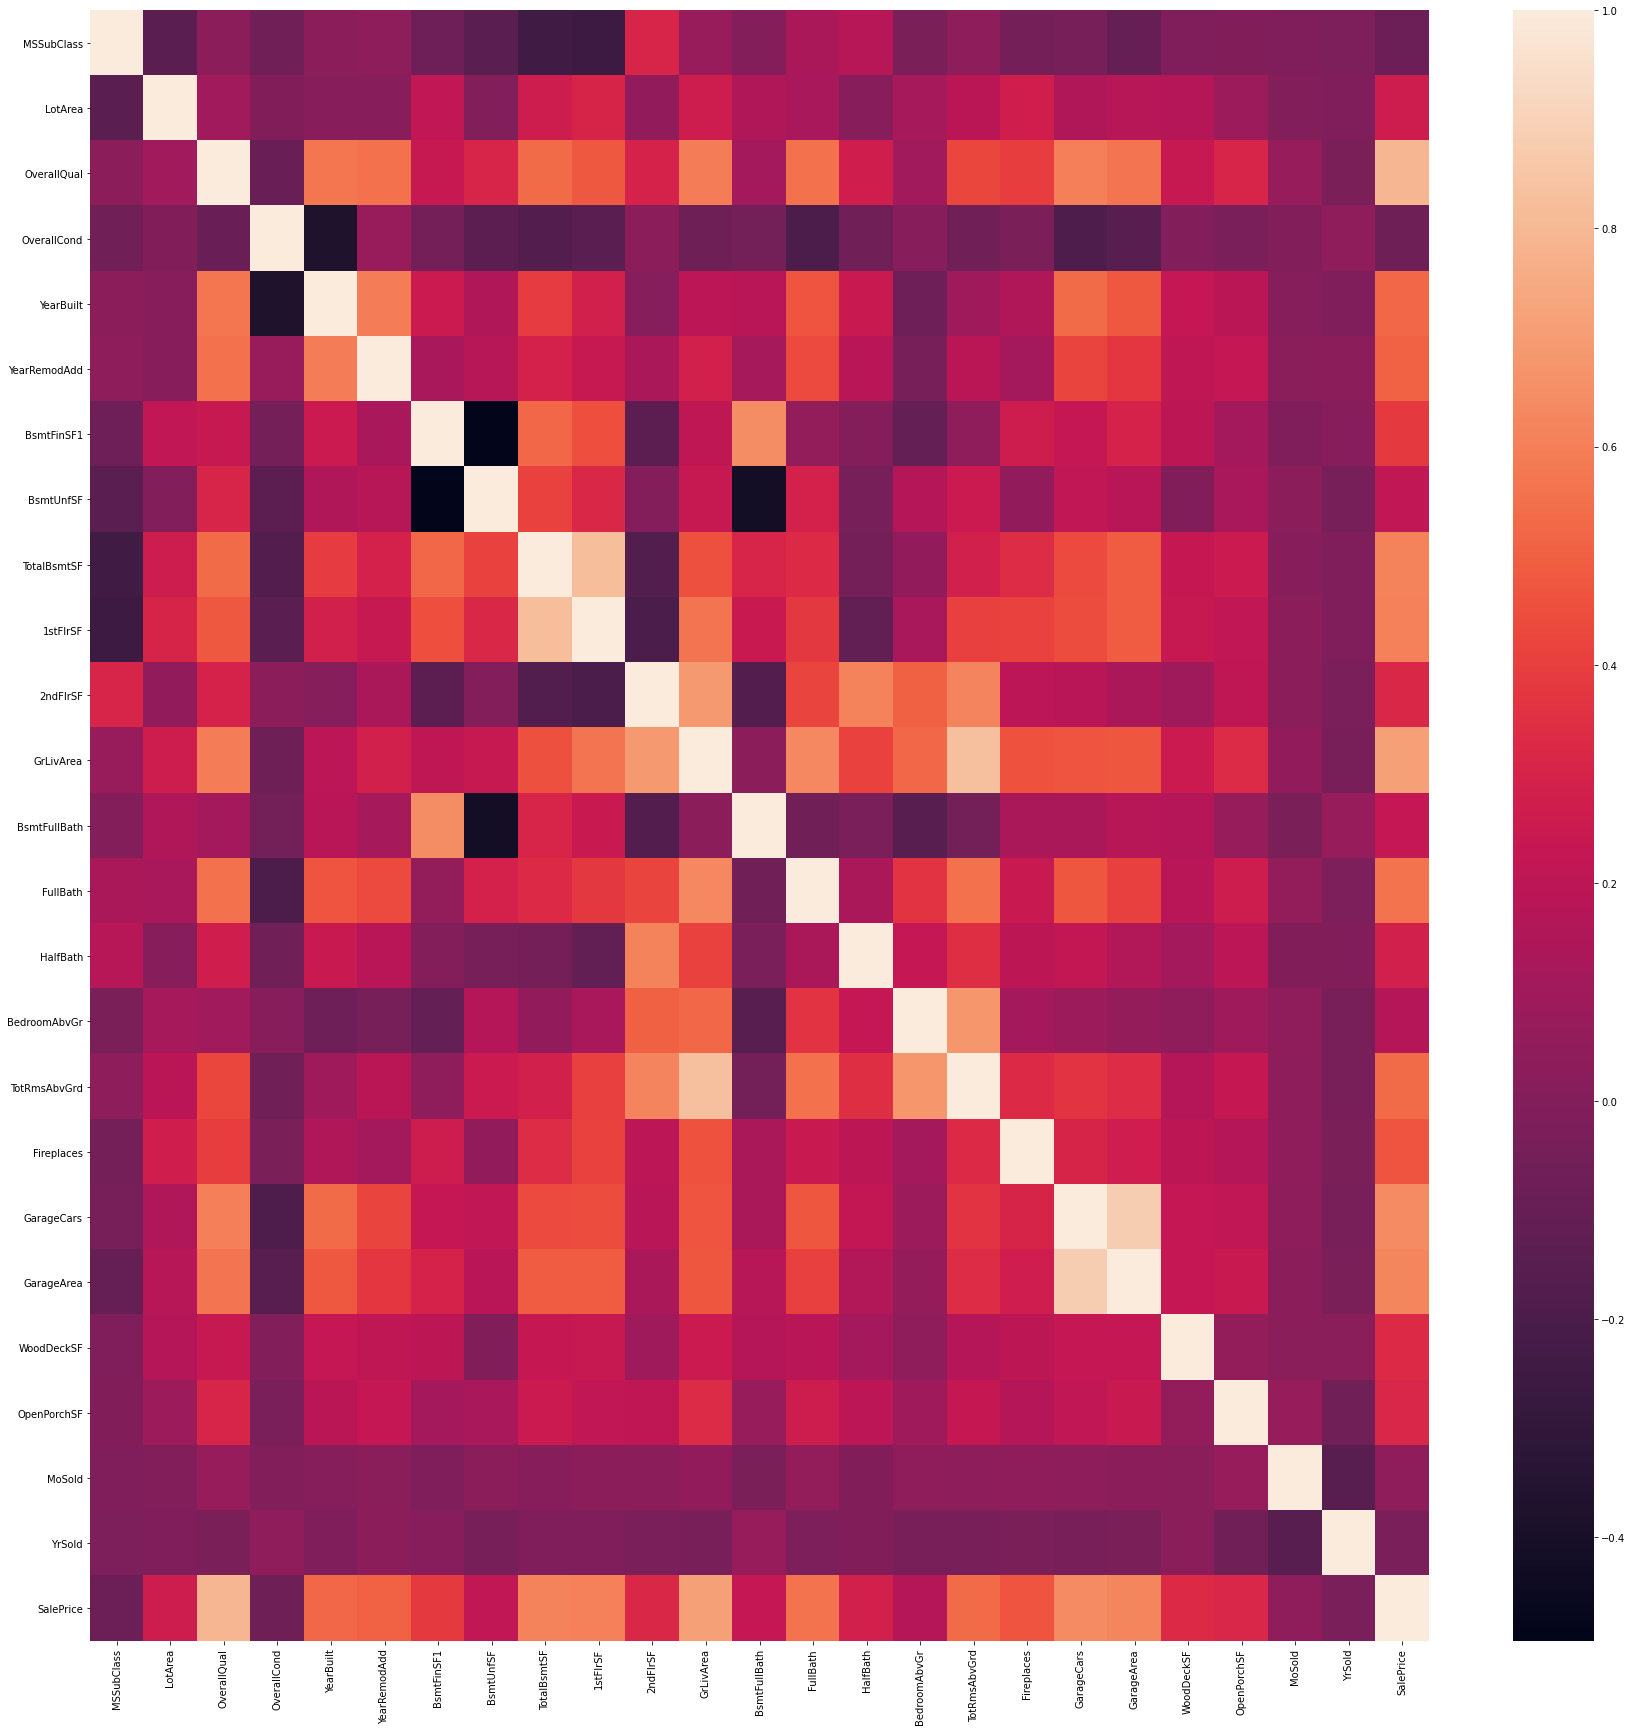

In [384]:
dims = (30, 30)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(int_train.corr())

In [385]:
int_train = pd.get_dummies(int_train, columns=['MSSubClass'], prefix=['MSSubClass'], dummy_na=True)

In [386]:
int_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan
0,8450,7,5,2003,2003,706,150,856,856,854,...,0,0,0,0,0,0,0,0,0,0
1,9600,6,8,1976,1976,978,284,1262,1262,0,...,0,0,0,0,0,0,0,0,0,0
2,11250,7,5,2001,2002,486,434,920,920,866,...,0,0,0,0,0,0,0,0,0,0
3,9550,7,5,1915,1970,216,540,756,961,756,...,1,0,0,0,0,0,0,0,0,0
4,14260,8,5,2000,2000,655,490,1145,1145,1053,...,0,0,0,0,0,0,0,0,0,0


In [387]:
float_train = o_train.select_dtypes(include=['float']).copy()

In [388]:
float_train.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [389]:
float_train.head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [390]:
def genData3(col):
    print(float_train[col].value_counts())
    print('Null Values', float_train[col].isnull().sum())
    
drop_cols = []
keep_cols = []
for col in float_train.columns:
    print(col)
    genData3(col)
    print('Keep y or Toss 0')
    response = input()
    if response == 'y': 
        keep_cols.append(col)
    else:
        drop_cols.append(col)

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64
Null Values 259
Keep y or Toss 0
y
MasVnrArea
0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64
Null Values 8
Keep y or Toss 0
y
GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
Null Values 81
Keep y or Toss 0
y


In [391]:
float_train = float_train.drop(drop_cols, axis=1)

In [392]:
float_train.head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


Combining DFs

In [430]:
int_train.fillna(int_train.mean(), inplace=True)
float_train.fillna(float_train.mean(), inplace=True)
c_train = pd.concat([obj_train, int_train, float_train], axis=1)


In [431]:
c_train.describe()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000
mean,0.006849,0.044521,0.010959,0.788356,0.149315,0.0,0.331507,0.028082,0.006849,0.633562,...,0.013699,0.035616,0.059589,0.043151,0.006849,0.020548,0.0,70.049958,103.685262,1978.506164
std,0.082505,0.206319,0.104145,0.408614,0.356521,0.0,0.470916,0.165264,0.082505,0.481996,...,0.116277,0.185395,0.236805,0.203266,0.082505,0.141914,0.0,22.024023,180.569112,23.994583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,21.000000,0.000000,1900.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,60.000000,0.000000,1962.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,70.049958,0.000000,1978.506164
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,79.000000,164.250000,2001.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,313.000000,1600.000000,2010.000000


In [432]:
c_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan,LotFrontage,MasVnrArea,GarageYrBlt
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,65.0,196.0,2003.0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,80.0,0.0,1976.0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,68.0,162.0,2001.0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,60.0,0.0,1998.0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,84.0,350.0,2000.0


In [433]:
c_train.columns

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'MSZoning_nan', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg',
       ...
       'MSSubClass_85.0', 'MSSubClass_90.0', 'MSSubClass_120.0',
       'MSSubClass_160.0', 'MSSubClass_180.0', 'MSSubClass_190.0',
       'MSSubClass_nan', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
      dtype='object', length=245)

In [451]:
print(c_train.isnull().sum().any())
from sklearn.feature_selection import SelectKBest, f_regression
X = c_train.drop(columns='SalePrice')
y = c_train['SalePrice'].copy()
X_best = SelectKBest(f_regression, k=10).fit_transform(X, y)

False


/Users/jackbrietzke/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [452]:
X_best.shape

(1460, 10)

In [447]:
print(X_best)

[[  0.   0.   7. ...   8.   2. 548.]
 [  1.   0.   6. ...   6.   2. 460.]
 [  0.   0.   7. ...   6.   2. 608.]
 ...
 [  0.   0.   7. ...   9.   1. 252.]
 [  1.   0.   5. ...   5.   1. 240.]
 [  0.   0.   5. ...   6.   1. 276.]]


In [493]:
val = 0.6
high_corr = abs(c_train.corr()['SalePrice'][abs(c_train.corr()['SalePrice'] > val)].drop('SalePrice')).index.tolist()
print(high_corr)

['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']


In [494]:
X = c_train.drop(columns='SalePrice')
y = c_train['SalePrice'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [495]:
lasso = linear_model.Lasso()
y_pred = cross_val_predict(lasso, X, y)
print(mean_squared_error(y_pred, y,squared=False))

/Users/jackbrietzke/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417940837754.734, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
/Users/jackbrietzke/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352261701342.9916, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(


33955.55606097523


/Users/jackbrietzke/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376809673143.4671, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
/Users/jackbrietzke/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404147376018.13104, tolerance: 770619031.1834062
  model = cd_fast.enet_coordinate_descent(
/Users/jackbrietzke/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303095563782.3965, tolerance: 724930391.3116124
  model = cd_fast.enet_coordinate_descent(
